<a href="https://colab.research.google.com/github/Akobabs/cancer-detection-nanoparticles/blob/main/cancer_detection_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer Detection Using Nanoparticles - EDA and Model Training
# This notebook implements the project in Google Colab using ucimlrepo, with fixed column names and visualization.



In [1]:
# Install dependencies
!pip install ucimlrepo pandas numpy scikit-learn matplotlib seaborn joblib

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_curve, auc, confusion_matrix
import joblib
from google.colab import drive
from ucimlrepo import fetch_ucirepo
import os
import json

# Mount Google Drive for saving models and results
drive.mount('/content/drive')

# Set random seed for reproducibility
np.random.seed(42)

# 1. Load Dataset using ucimlrepo
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Combine X and y for EDA
data = X.copy()
data['diagnosis'] = y['Diagnosis']

# Print metadata and variable information
print("Dataset Metadata:")
print(breast_cancer_wisconsin_diagnostic.metadata)
print("\n Variable Information:")
print(breast_cancer_wisconsin_diagnostic.variables)

# Inspect column names
print("\n Column Names in X:")
print(X.columns.tolist())

# Save dataset to Google Drive for reproducibility
os.makedirs('/content/drive/MyDrive/cancer-detection-nanoparticles/data/raw', exist_ok=True)
data.to_csv('/content/drive/MyDrive/cancer-detection-nanoparticles/data/raw/wisconsin_breast_cancer.csv', index=False)

Mounted at /content/drive
Dataset Metadata:
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imagin


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float6

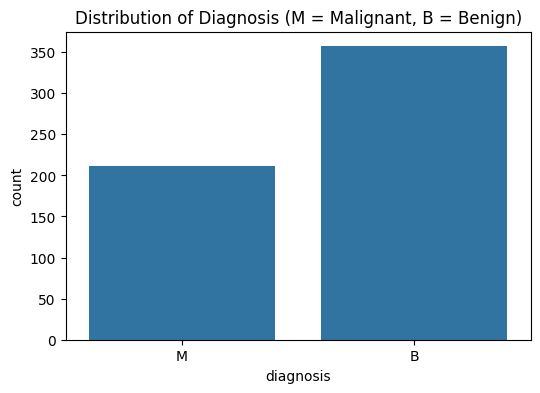

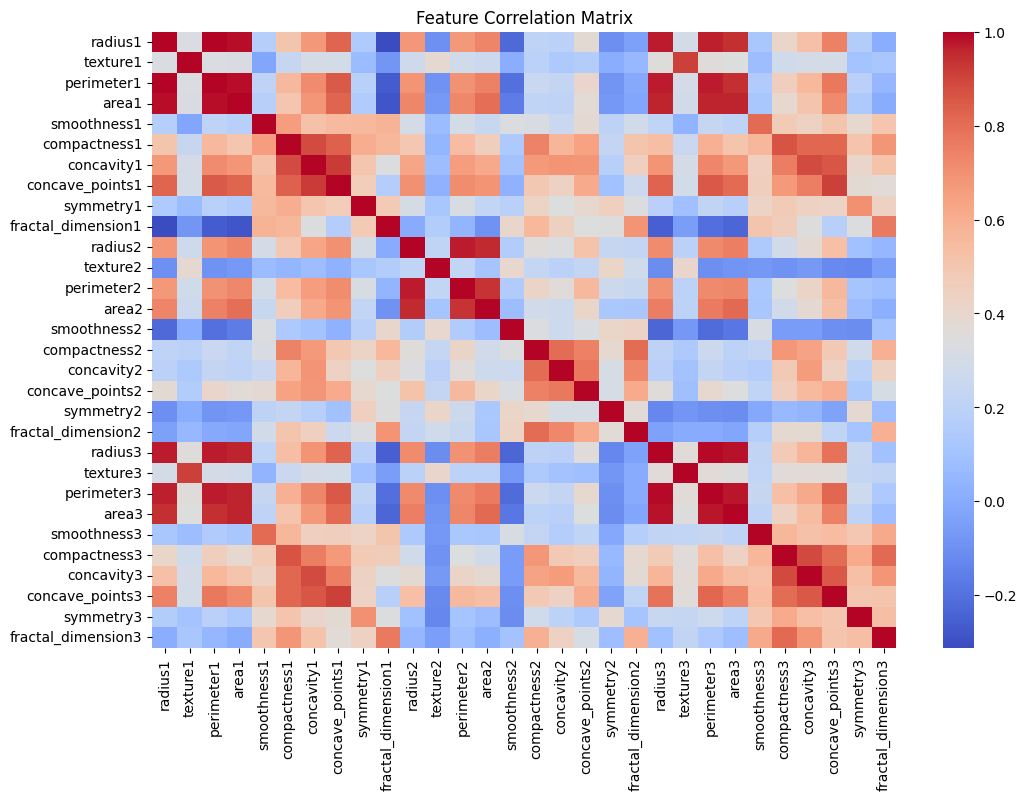

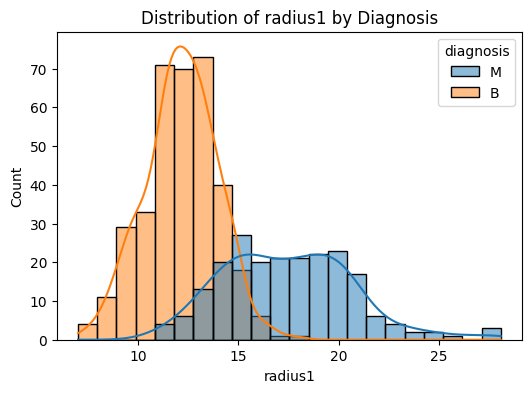

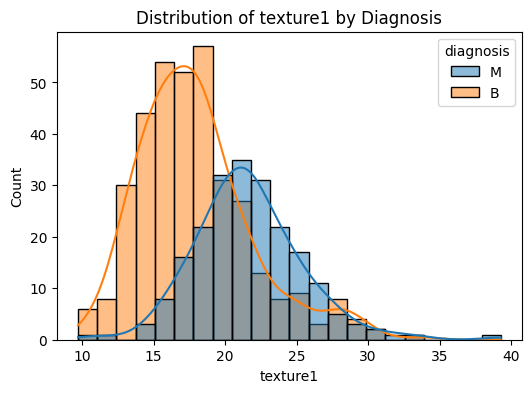

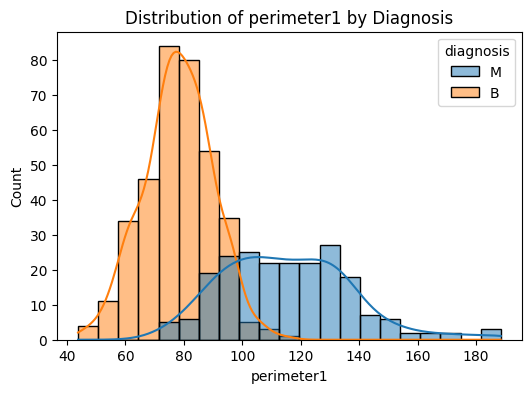

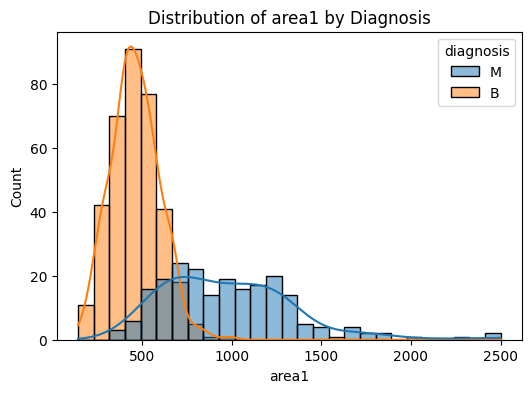

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Exploratory Data Analysis (EDA)
# Basic info
print("\nDataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

# Create directory for figures
os.makedirs('/content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/figures', exist_ok=True)

# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis (M = Malignant, B = Benign)')
plt.savefig('/content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/figures/diagnosis_distribution.png')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.savefig('/content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/figures/correlation_matrix.png')
plt.show()

# Distribution of key features (using ucimlrepo column names)
key_features = ['radius1', 'texture1', 'perimeter1', 'area1']  # Adjust to match your dataset's column names
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.savefig(f'/content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/figures/{feature}_distribution.png')
    plt.show()

In [8]:
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 3. Data Preprocessing

# Encode target variable (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
y = data['diagnosis']

# Ensure 'X' exists and excludes the target
X = data.drop(columns=['diagnosis'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
os.makedirs('/content/drive/MyDrive/cancer-detection-nanoparticles/models/trained_models', exist_ok=True)
joblib.dump(scaler, '/content/drive/MyDrive/cancer-detection-nanoparticles/models/trained_models/scaler.joblib')

# Optional: Check shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("Scaler saved successfully.")

X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)
Scaler saved successfully.


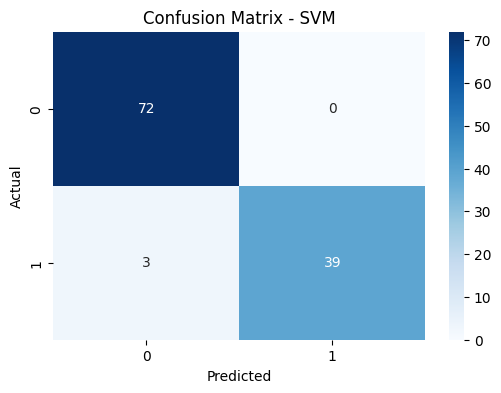

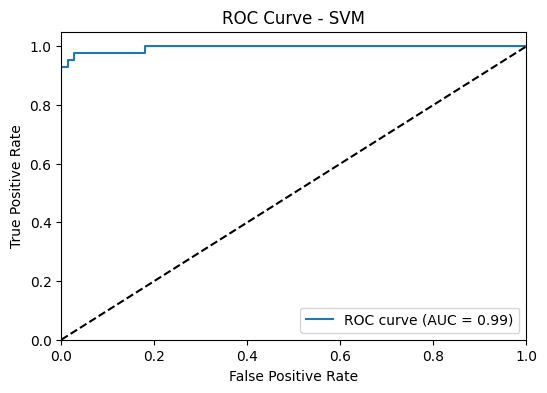

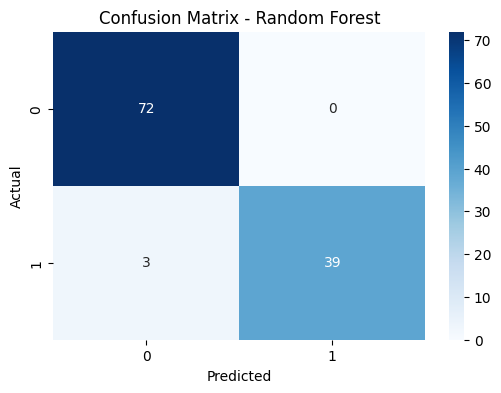

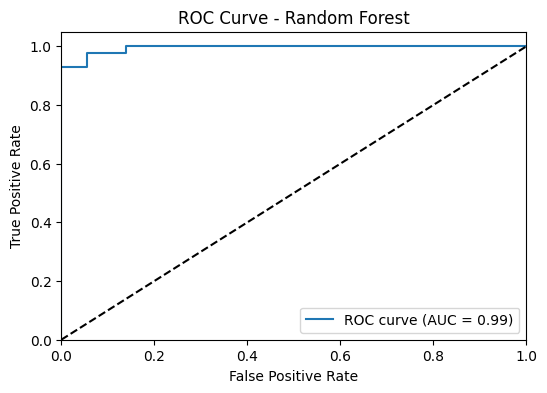

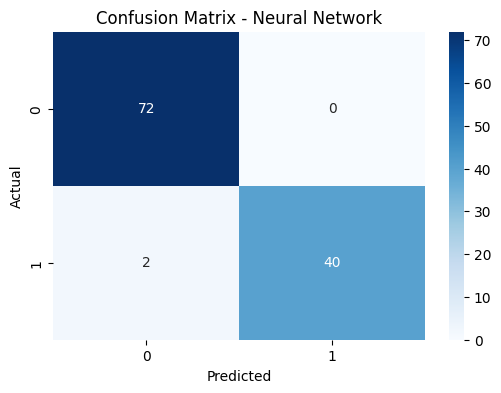

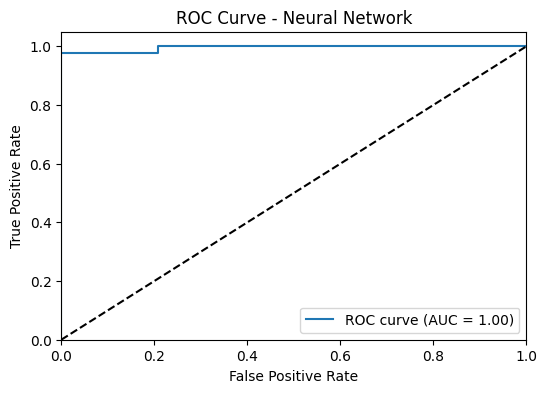


Model Performance Summary:
            Model  Accuracy  Precision    Recall  F1-Score       MSE
0             SVM  0.973684        1.0  0.928571  0.962963  0.026316
1   Random Forest  0.973684        1.0  0.928571  0.962963  0.026316
2  Neural Network  0.982456        1.0  0.952381  0.975610  0.017544


In [9]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, confusion_matrix, roc_curve, auc
)

# 4. Model Training and Evaluation
models = {
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=42, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'MSE': []}

# Ensure output directories exist
figures_dir = '/content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/figures'
models_dir = '/content/drive/MyDrive/cancer-detection-nanoparticles/models/trained_models'
results_dir = '/content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/results'

os.makedirs(figures_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Train and evaluate each model
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['MSE'].append(mse)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(os.path.join(figures_dir, f'confusion_matrix_{name.lower().replace(" ", "_")}.png'))
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.savefig(os.path.join(figures_dir, f'roc_curve_{name.lower().replace(" ", "_")}.png'))
    plt.show()

    # Save model
    joblib.dump(model, os.path.join(models_dir, f'{name.lower().replace(" ", "_")}_model.joblib'))

# Save results
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

results_df.to_csv(os.path.join(results_dir, 'model_performance.csv'), index=False)


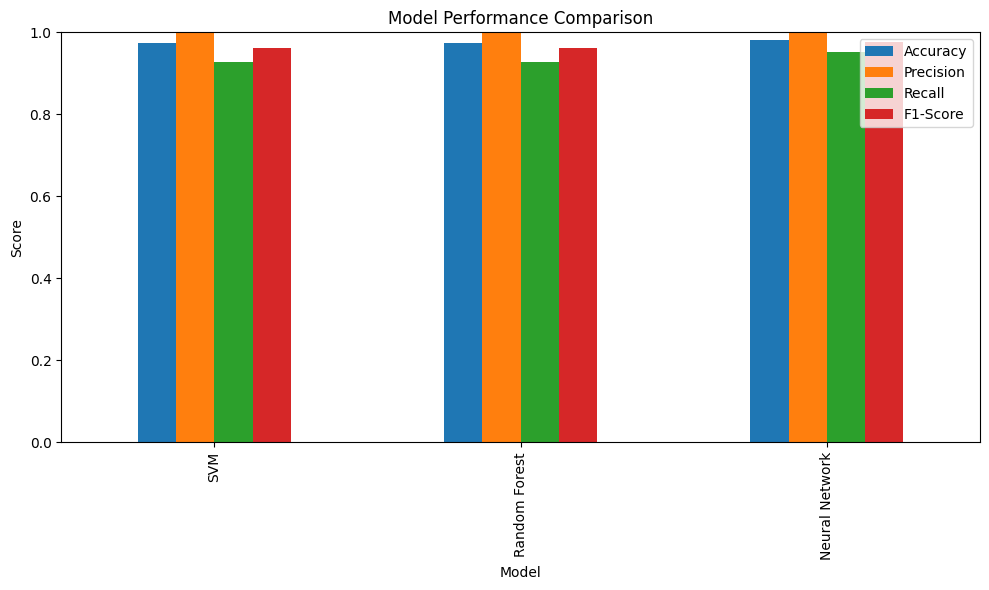

Performance chart saved as PNG and JSON:
- Image: /content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/figures/model_performance_comparison.png
- JSON: /content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/results/performance_chart.json


In [11]:
import matplotlib.pyplot as plt
import os
import json

# 5. Visualization of Model Performance

# Plot bar chart with Matplotlib
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.tight_layout()

# Save bar chart
fig_path = '/content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/figures/model_performance_comparison.png'
plt.savefig(fig_path)
plt.show()

# Prepare data for Streamlit visualization (Chart.js config)
labels = results_df['Model'].tolist()
chart_data = {
    "type": "bar",
    "data": {
        "labels": labels,
        "datasets": []
    },
    "options": {
        "scales": {
            "y": {
                "beginAtZero": True,
                "max": 1
            }
        },
        "plugins": {
            "legend": {
                "position": "top"
            },
            "title": {
                "display": True,
                "text": "Model Performance Comparison"
            }
        }
    }
}

# Metrics to include and their visual styles
metrics = {
    "Accuracy": "rgba(54, 162, 235, 0.6)",
    "Precision": "rgba(255, 99, 132, 0.6)",
    "F1-Score": "rgba(75, 192, 192, 0.6)"
}
border_colors = {
    "Accuracy": "rgba(54, 162, 235, 1)",
    "Precision": "rgba(255, 99, 132, 1)",
    "F1-Score": "rgba(75, 192, 192, 1)"
}

for metric, bg_color in metrics.items():
    dataset = {
        "label": metric,
        "data": results_df[metric].tolist(),
        "backgroundColor": bg_color,
        "borderColor": border_colors[metric],
        "borderWidth": 1
    }
    chart_data["data"]["datasets"].append(dataset)

# Save chart config as JSON
results_dir = '/content/drive/MyDrive/cancer-detection-nanoparticles/notebooks/results'
os.makedirs(results_dir, exist_ok=True)

chart_json_path = os.path.join(results_dir, 'performance_chart.json')
with open(chart_json_path, 'w') as f:
    json.dump(chart_data, f, indent=4)

print(f"Performance chart saved as PNG and JSON:\n- Image: {fig_path}\n- JSON: {chart_json_path}")